In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime as dt
%matplotlib inline

In [19]:
data = pd.read_csv('engagemen_full.csv', low_memory=False, index_col=False)

In [20]:
data.head()

,Unnamed: 0,time,lp_id,pct_access,engagement_index,district_id,state,locale,pct_black_hispanic,pct_free_reduced,county_connections_ratio,pp_total_raw,url,product_name,provider_company_name,ps_function_main,ps_function_sub,corporate,higher_ed,prek_12
0,67430,2020-01-01,32213,0.41,18.49,7305,Massachusetts,Suburb,"[0, 0.2[",NaN,"[0.18, 1[","[14000, 16000[",https://classroom.google.com,Google Classroom,Google LLC,SDO,Learning Management Systems (LMS),1,1,1
1,67431,2020-01-01,51340,0.07,6.85,7305,Massachusetts,Suburb,"[0, 0.2[",NaN,"[0.18, 1[","[14000, 16000[",https://www.grammarly.com/,Grammarly,Grammarly,LC,Study Tools,1,1,1
2,67432,2020-01-01,49062,0.07,6.16,7305,Massachusetts,Suburb,"[0, 0.2[",NaN,"[0.18, 1[","[14000, 16000[",http://www.quia.com/web,Quia Web,IXL Learning,LC,Digital Learning Platforms,0,0,1
3,67433,2020-01-01,99916,0.41,10.27,7305,Massachusetts,Suburb,"[0, 0.2[",NaN,"[0.18, 1[","[14000, 16000[",https://drive.google.com/start,Google Drive,Google LLC,LC/CM/SDO,Other,1,1,1
4,67434,2020-01-01,95731,0.68,47.26,7305,Massachusetts,Suburb,"[0, 0.2[",NaN,"[0.18, 1[","[14000, 16000[",http://docs.google.com/,Google Docs,Google LLC,LC,Content Creation & Curation,1,1,1


In [21]:
data = data.drop('Unnamed: 0', 1)

In [22]:
data.dtypes

time                         object
lp_id                         int64
pct_access                  float64
engagement_index            float64
district_id                   int64
state                        object
locale                       object
pct_black_hispanic           object
pct_free_reduced             object
county_connections_ratio     object
pp_total_raw                 object
url                          object
product_name                 object
provider_company_name        object
ps_function_main             object
ps_function_sub              object
corporate                     int64
higher_ed                     int64
prek_12                       int64
dtype: object

In [23]:
# convert "time" to the datetime format
data['time'] = pd.to_datetime(data['time'])

In [24]:
data.shape

(9139701, 19)

In [25]:
# Wow many Nan's in the data? 
data.isna().sum()

time                              0
lp_id                             0
pct_access                     5846
engagement_index            1825936
district_id                       0
state                             0
locale                            0
pct_black_hispanic                0
pct_free_reduced            1387433
county_connections_ratio     755602
pp_total_raw                2900755
url                               0
product_name                      0
provider_company_name             0
ps_function_main                  0
ps_function_sub                   0
corporate                         0
higher_ed                         0
prek_12                           0
dtype: int64

So, according to https://nces.ed.gov/programs/digest/d20/tables/dt20_204.10.asp, roughly 40% of students are eligible for free or reduced lunch, and USA spending ranges from 40% to 60%. As a result, it is preferable to populate those values with [0.4,0.6[


In [26]:
# How many districts in each state?
data.groupby('state')['district_id'].nunique()[0]

1

In [27]:
# Count the missing pp_total_raw
no_pp = data[data['pp_total_raw'].isna()].copy()

In [28]:
print(data.district_id.nunique())
print(no_pp.district_id.nunique())

176
58


In [29]:
no_pp.groupby('state')['district_id'].nunique()

state
Arizona           1
California       12
Connecticut      30
New Hampshire     2
New York          1
North Dakota      1
Ohio             11
Name: district_id, dtype: int64

In [41]:
data.pp_total_raw.unique()

array(['[14000, 16000[', '[20000, 22000[', '[6000, 8000[',
       '[12000, 14000[', '[8000, 10000[', nan, '[18000, 20000[',
       '[10000, 12000[', '[16000, 18000[', '[22000, 24000[',
       '[32000, 34000[', '[4000, 6000['], dtype=object)

In [30]:
data['pp_total_raw']=np.where(data['state']=='Connecticut','[18000, 20000[' , data.pp_total_raw)
data['pp_total_raw']=np.where(data['state']=='California','[12000, 14000[' , data.pp_total_raw)
data['pp_total_raw']=np.where(data['state']=='Ohio','[12000, 14000[' , data.pp_total_raw)
data['pp_total_raw']=np.where(data['state']=='New York','[22000, 24000[' , data.pp_total_raw)
data['pp_total_raw']=np.where(data['state']=='North Dakota','[12000, 14000[' , data.pp_total_raw)
data['pp_total_raw']=np.where(data['state']=='Arizona','[8000, 10000[' , data.pp_total_raw)
data['pp_total_raw']=np.where(data['state']=='New Hampshire','[16000, 18000[' , data.pp_total_raw)

In [31]:
# [0.18, 1[ - value majoreted in data
data.groupby('county_connections_ratio')['district_id'].count()

county_connections_ratio
[0.18, 1[    8382895
[1, 2[          1204
Name: district_id, dtype: int64

In [33]:
data['county_connections_ratio'] = data['county_connections_ratio'].fillna('[0.18, 1[')

In [35]:
data.pct_access.corr(data.engagement_index)

0.733857085948641

In [36]:
data[data['engagement_index'].isna()].head()

,time,lp_id,pct_access,engagement_index,district_id,state,locale,pct_black_hispanic,pct_free_reduced,county_connections_ratio,pp_total_raw,url,product_name,provider_company_name,ps_function_main,ps_function_sub,corporate,higher_ed,prek_12
5,2020-01-01,76649,0.0,NaN,7305,Massachusetts,Suburb,"[0, 0.2[",NaN,"[0.18, 1[","[14000, 16000[",https://clever.com/,Clever,Clever,SDO,School Management Software,0,0,1
8,2020-01-01,64998,0.0,NaN,7305,Massachusetts,Suburb,"[0, 0.2[",NaN,"[0.18, 1[","[14000, 16000[",http://web.stmath.com/,ST Math,MIND Research Institute,LC,Digital Learning Platforms,0,0,1
10,2020-01-01,28504,0.0,NaN,7305,Massachusetts,Suburb,"[0, 0.2[",NaN,"[0.18, 1[","[14000, 16000[",http://google.com/sheets/about/,Google Sheets,Google LLC,LC/CM/SDO,Other,1,1,1
13,2020-01-01,47267,0.0,NaN,7305,Massachusetts,Suburb,"[0, 0.2[",NaN,"[0.18, 1[","[14000, 16000[",http://www.classdojo.com/,ClassDojo,"ClassDojo, Inc.",CM,Classroom Engagement & Instruction,0,0,1
16,2020-01-02,83862,0.0,NaN,7305,Massachusetts,Suburb,"[0, 0.2[",NaN,"[0.18, 1[","[14000, 16000[",http://www.raz-kids.com/,Raz-Kids,Learning A-Z,LC,Digital Learning Platforms,0,0,1


In [37]:
data[data['district_id']==7305]

,time,lp_id,pct_access,engagement_index,district_id,state,locale,pct_black_hispanic,pct_free_reduced,county_connections_ratio,pp_total_raw,url,product_name,provider_company_name,ps_function_main,ps_function_sub,corporate,higher_ed,prek_12
0,2020-01-01,32213,0.41,18.49,7305,Massachusetts,Suburb,"[0, 0.2[",NaN,"[0.18, 1[","[14000, 16000[",https://classroom.google.com,Google Classroom,Google LLC,SDO,Learning Management Systems (LMS),1,1,1
1,2020-01-01,51340,0.07,6.85,7305,Massachusetts,Suburb,"[0, 0.2[",NaN,"[0.18, 1[","[14000, 16000[",https://www.grammarly.com/,Grammarly,Grammarly,LC,Study Tools,1,1,1
2,2020-01-01,49062,0.07,6.16,7305,Massachusetts,Suburb,"[0, 0.2[",NaN,"[0.18, 1[","[14000, 16000[",http://www.quia.com/web,Quia Web,IXL Learning,LC,Digital Learning Platforms,0,0,1
3,2020-01-01,99916,0.41,10.27,7305,Massachusetts,Suburb,"[0, 0.2[",NaN,"[0.18, 1[","[14000, 16000[",https://drive.google.com/start,Google Drive,Google LLC,LC/CM/SDO,Other,1,1,1
4,2020-01-01,95731,0.68,47.26,7305,Massachusetts,Suburb,"[0, 0.2[",NaN,"[0.18, 1[","[14000, 16000[",http://docs.google.com/,Google Docs,Google LLC,LC,Content Creation & Curation,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33338,2020-12-31,98265,0.10,21.45,7305,Massachusetts,Suburb,"[0, 0.2[",NaN,"[0.18, 1[","[14000, 16000[",http://quizlet.com/,Quizlet,Quizlet,LC,Study Tools,0,0,1
33339,2020-12-31,28324,0.00,NaN,7305,Massachusetts,Suburb,"[0, 0.2[",NaN,"[0.18, 1[","[14000, 16000[",http://www.curriculumassociates.com/products/r...,i-Ready Reading,Curriculum Associates,LC,Digital Learning Platforms,0,0,1
33340,2020-12-31,49687,0.05,1.57,7305,Massachusetts,Suburb,"[0, 0.2[",NaN,"[0.18, 1[","[14000, 16000[",https://www.snapchat.com/,Snapchat,Snap Inc.,LC/CM/SDO,Other,0,1,1
33341,2020-12-31,51340,0.05,5.23,7305,Massachusetts,Suburb,"[0, 0.2[",NaN,"[0.18, 1[","[14000, 16000[",https://www.grammarly.com/,Grammarly,Grammarly,LC,Study Tools,1,1,1


In [38]:
data['ps_function_sub'].unique()

array(['Learning Management Systems (LMS)', 'Study Tools',
       'Digital Learning Platforms', 'Other',
       'Content Creation & Curation', 'School Management Software',
       'Sites, Resources & Reference',
       'Classroom Engagement & Instruction',
       'Data, Analytics & Reporting', 'Courseware & Textbooks',
       'Career Planning & Job Search', 'Teacher Resources',
       'Human Resources',
       'Online Course Providers & Technical Skills Development',
       'Large-Scale & Standardized Testing',
       'Admissions, Enrollment & Rostering', 'Virtual Classroom',
       'Environmental, Health & Safety (EHS) Compliance'], dtype=object)

In [39]:
# fillna 'engagement_index' by min() for each district
data['engagement_index'] = data['engagement_index'].fillna(data.groupby('district_id')['engagement_index'].transform('min'))

# data['engagement_index'] = data['engagement_index'].fillna(0)




In [40]:
# fillna 'pct_access' by min() for each district
data['pct_access'] = data['pct_access'].fillna(data.groupby('district_id')['pct_access'].transform('min'))

In [41]:
# fillna'pct_free_reduced'
# So, according to https://nces.ed.gov/programs/digest/d20/tables/dt20_204.10.asp, roughly 40% of students are eligible for free or reduced lunch, and USA spending ranges from 40% to 60%. 
# As a result, it is preferable to populate those values with [0.4,0.6[

data['pct_free_reduced'] = data['pct_free_reduced'].fillna('[0.4, 0.6[')


In [17]:
data.dtypes

time                        datetime64[ns]
lp_id                                int64
pct_access                         float64
engagement_index                   float64
district_id                          int64
state                               object
locale                              object
pct_black_hispanic                  object
pct_free_reduced                    object
county_connections_ratio            object
pp_total_raw                        object
url                                 object
product_name                        object
provider_company_name               object
ps_function_main                    object
ps_function_sub                     object
corporate                            int64
higher_ed                            int64
prek_12                              int64
dtype: object

In [42]:
data.isna().sum()

time                        0
lp_id                       0
pct_access                  0
engagement_index            0
district_id                 0
state                       0
locale                      0
pct_black_hispanic          0
pct_free_reduced            0
county_connections_ratio    0
pp_total_raw                0
url                         0
product_name                0
provider_company_name       0
ps_function_main            0
ps_function_sub             0
corporate                   0
higher_ed                   0
prek_12                     0
dtype: int64

In [86]:
data['product_name'].unique()

array(['Google Classroom', 'Grammarly', 'Quia Web', 'Google Drive',
       'Google Docs', 'Clever', 'Chrome Web Store', 'Google Earth',
       'ST Math', 'Quora', 'Google Sheets', 'Disney+', 'Netflix',
       'ClassDojo', 'College Compass', 'Desmos', 'Raz-Kids',
       'Google Arts & Culture', 'WordPress', 'Big Ideas Math',
       'Leveled Literacy Intervention', 'Quizlet', 'LinkedIn',
       'SoundCloud', 'nytimes.com', 'Studies Weekly', 'Qualtrics',
       'Freckle by Renaissance', 'HP', 'XtraMath', 'ReadWorks',
       'Generation Genius', 'Newsela', 'Turtle Diary', 'PBS',
       'Typing.com', 'Enchanted Learning', 'Google Calendar', 'Wikipedia',
       'MarketWatch', 'MIT App Inventor', 'Common App', 'eNotes',
       'The Washington Post KidsPost', 'Kiddle',
       'Boom Cards by Boom Learning', 'Google Forms',
       'TeachersPayTeachers', 'ABCya!', 'Google Expeditions',
       "Gale Presents: Peterson's Test Prep", 'Lexia Core5 Reading',
       'Google Play Music', 'TypingClub', '

In [18]:
data.groupby('district_id', as_index=False).agg({'time':lambda x:(data.time.max()-x.max()).days})['time'].value_counts()

0      163
1        3
17       2
132      1
114      1
112      1
304      1
302      1
23       1
13       1
10       1
Name: time, dtype: int64

In [19]:
customers = data.groupby(['district_id'], as_index = False).agg({'pct_access':'count', 'time':lambda x:(data.time.max()-x.max()).days, 'lp_id':'nunique', 'engagement_index':lambda x:round(x.sum()/1000, 0), 'provider_company_name':'nunique', 'ps_function_sub':'nunique'}) \
    .rename(columns = {'pct_access':'frequency', 'time': 'recency', 'lp_id':'num_products_used', 'engagement_index':'total_pages_per_student', 'provider_company_name':'num_providers', 'ps_function_sub':'function_covered' })

In [196]:
print(data.engagement_index.min())
print(data.engagement_index.max())
print(data.engagement_index.mean())

0.01
146282.09
209.70732500127374


In [43]:
data.to_csv('data_no_nan')

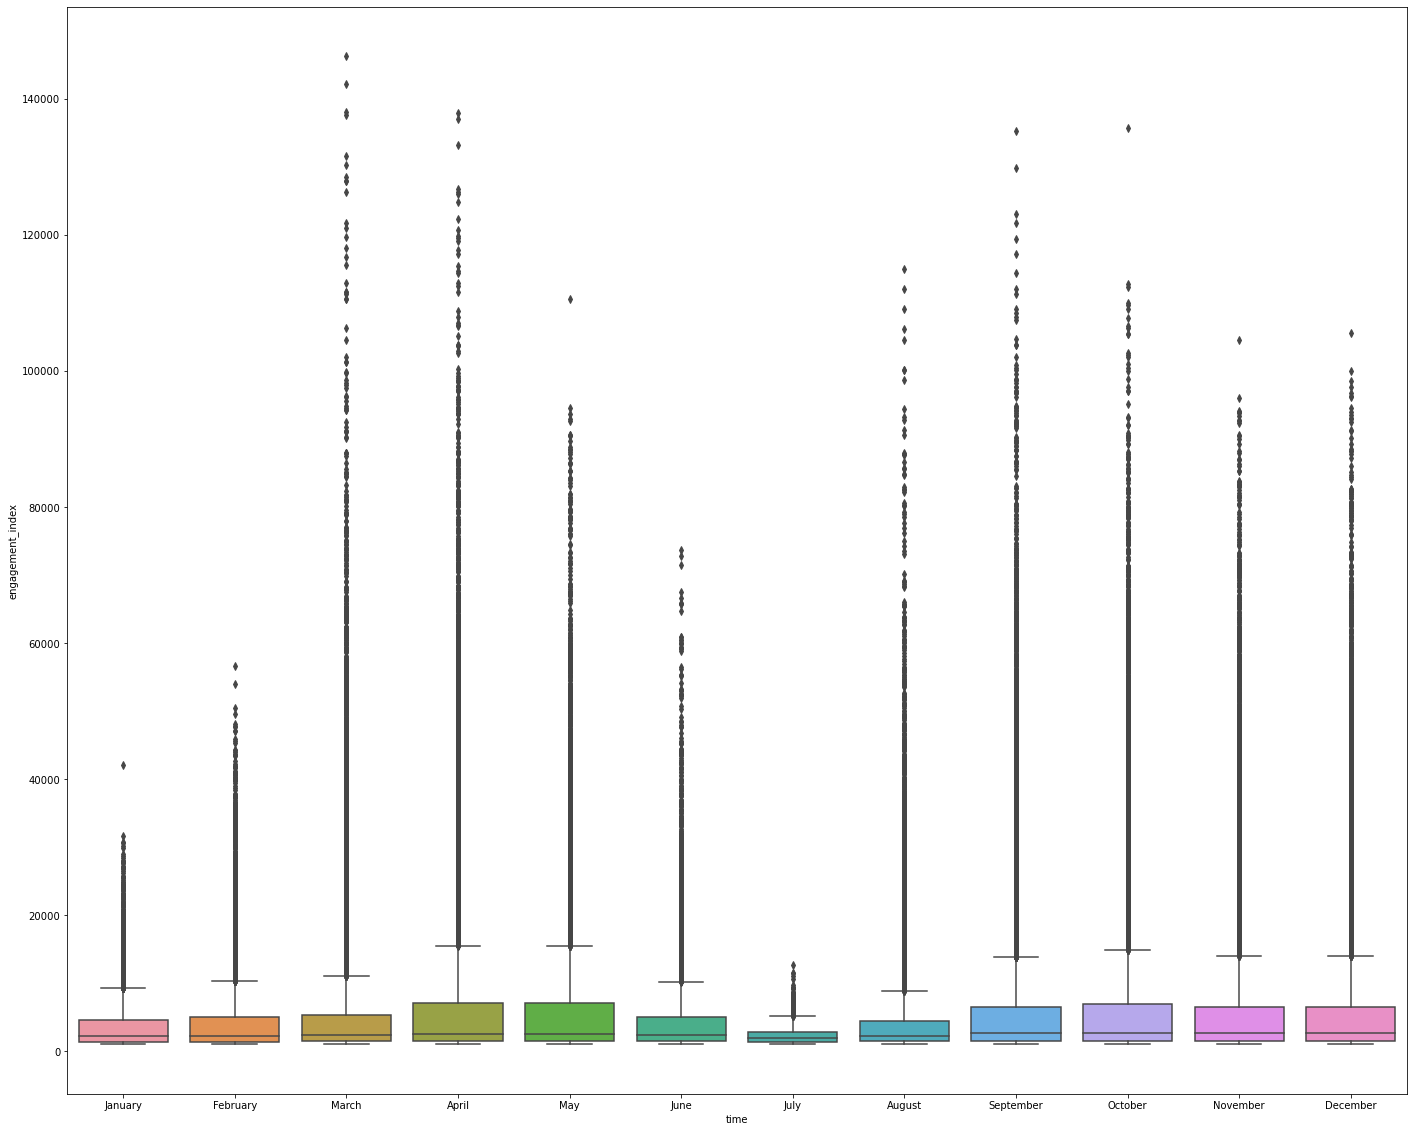

In [209]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 20))
sns.boxplot(x=data.time.dt.month_name(), y=data.query('engagement_index > 1000').engagement_index)
# plt.legend()
plt.show()

In [20]:
customers_top_product = data.query('engagement_index > 1000')\
    .groupby(['district_id'], as_index = False)\
    .agg({'pct_access':'count', 'time':lambda x:(data.time.max()-x.max()).days, 'lp_id':'nunique', 'engagement_index':lambda x:round(x.sum()/1000, 0), 'provider_company_name':'nunique', 'ps_function_sub':'nunique'}) \
    .rename(columns = {'pct_access':'frequency', 'time': 'recency', 'lp_id':'num_products_used', 'engagement_index':'total_pages_per_student', 'provider_company_name':'num_providers', 'ps_function_sub':'function_covered' })

In [207]:
customers_top_product.head()

,district_id,frequency,recency,num_products_used,total_pages_per_student,num_providers,function_covered
0,1000,1525,0,46,8067.0,35,13
1,1044,2068,0,27,13143.0,18,12
2,1052,2284,0,62,13051.0,50,11
3,1142,1484,0,52,7307.0,40,10
4,1204,1251,8,40,3455.0,31,9


In [126]:
customers

,district_id,frequency,recency,num_products_used,total_pages_per_student,num_providers,function_covered
0,1000,63356,0,366,10089.0,286,18
1,1044,98278,0,365,15986.0,288,18
2,1052,55638,0,361,15440.0,284,18
3,1142,21515,0,338,8857.0,263,18
4,1204,26620,0,343,5084.0,268,17
...,...,...,...,...,...,...,...
171,9589,64819,0,362,12743.0,283,18
172,9778,49374,0,365,5317.0,285,18
173,9812,93149,0,366,10030.0,287,18
174,9899,58296,0,362,14057.0,285,18


In [133]:
customers_daily = data.groupby(['district_id', 'time']) \
    .agg({'pct_access':'count', 'lp_id':'nunique', 'engagement_index':lambda x:round(x.sum()/1000, 0), 'provider_company_name':'nunique', 'ps_function_sub':'nunique'}) \
    .rename(columns = {'pct_access':'frequency', 'lp_id':'num_products_used', 'engagement_index':'total_pages_per_student', 'provider_company_name':'num_providers', 'ps_function_sub':'function_covered' }).reset_index()

In [138]:
customers_daily.query("time > '2020-03-01' & time < '2020-03-28'")

,district_id,time,frequency,num_products_used,total_pages_per_student,num_providers,function_covered
61,1000,2020-03-02,230,230,69.0,183,16
62,1000,2020-03-03,229,229,63.0,182,16
63,1000,2020-03-04,217,217,63.0,175,16
64,1000,2020-03-05,217,217,60.0,178,16
65,1000,2020-03-06,213,213,63.0,174,16
...,...,...,...,...,...,...,...
60502,9927,2020-03-23,188,188,25.0,150,17
60503,9927,2020-03-24,170,170,19.0,139,16
60504,9927,2020-03-25,185,185,20.0,148,16
60505,9927,2020-03-26,183,183,21.0,143,16


In [146]:
summary_customers = customers_daily.groupby('time', as_index = False)\
    .agg({'district_id':'nunique', 'frequency':'mean', 'num_products_used':'mean', 'total_pages_per_student':'mean', 'num_providers':'mean', 'function_covered':'mean'})\
    .rename(columns = {'district_id':'num_districts', 'frequency':'avg_frequency', 'num_products_used':'avg_num_products_used', 'total_pages_per_student':'avg_total_pages_per_student', 'num_providers':'avg_num_providers', 'function_covered':'avg_function_covered'})




In [169]:
summary_customers.tail()

,time,num_districts,avg_frequency,avg_num_products_used,avg_total_pages_per_student,avg_num_providers,avg_function_covered,weekday
361,2020-12-27,161,87.248447,87.248447,3.857143,68.763975,12.720497,6
362,2020-12-28,162,104.450617,104.450617,5.018519,82.598765,13.456790,0
363,2020-12-29,163,106.865031,106.865031,5.306748,84.699387,13.533742,1
364,2020-12-30,163,106.472393,106.472393,5.282209,84.460123,13.294479,2
365,2020-12-31,163,103.595092,103.595092,4.969325,82.226994,13.226994,3


In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
# Remove weekends from the dataframe
summary_customers['weekday'] = pd.DatetimeIndex(summary_customers['time']).weekday
summary_customers_without_weekends = summary_customers[summary_customers.weekday < 5]

engagement_index - Total page-load events per one thousand students of a given product and on a given day
pct_access - Percentage of students in the district have at least one page-load event of a given product and on a given day

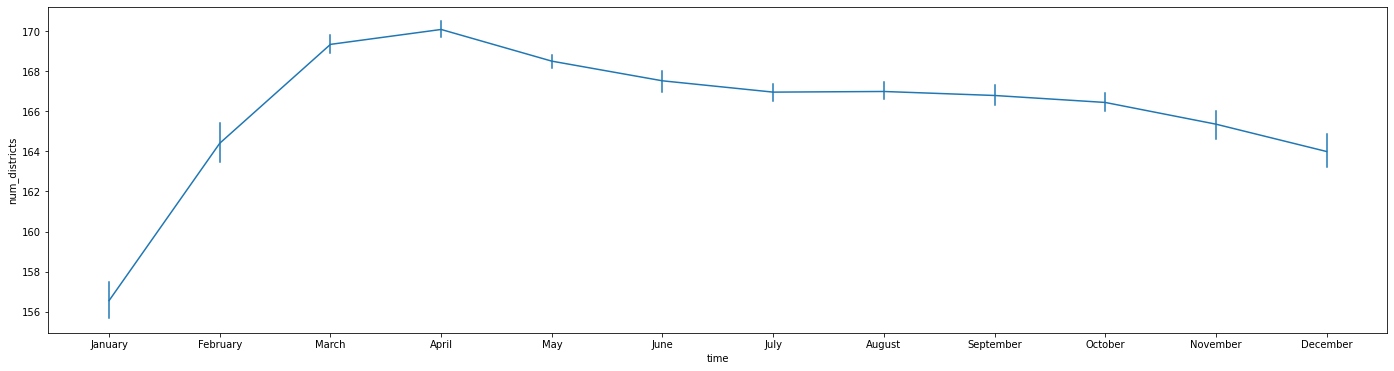

In [194]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))
sns.lineplot(x=summary_customers['time'].dt.month_name(), y=summary_customers.num_districts, err_style='bars')
# plt.legend()
plt.show()

In [178]:
summary_customers['month'] = summary_customers['time'].dt.month

In [179]:
summary_customers.head()

,time,num_districts,avg_frequency,avg_num_products_used,avg_total_pages_per_student,avg_num_providers,avg_function_covered,weekday,month
0,2020-01-01,153,64.313725,64.313725,0.934641,51.830065,12.143791,2,1
1,2020-01-02,155,108.303226,108.303226,9.335484,86.638710,13.683871,3,1
2,2020-01-03,156,111.897436,111.897436,9.717949,89.878205,13.743590,4,1
3,2020-01-04,152,74.592105,74.592105,1.138158,60.243421,12.927632,5,1
4,2020-01-05,153,85.934641,85.934641,1.836601,69.575163,13.228758,6,1


In [160]:
# plt.figure(figsize = (20,5))
# sns.barplot(x ='time', y ='num_districts', data = summary_customers_without_weekends)
# plt.title('State V/s Avg Expenditure per pupil')
# plt.legend()
# plt.xticks(rotation = 90)

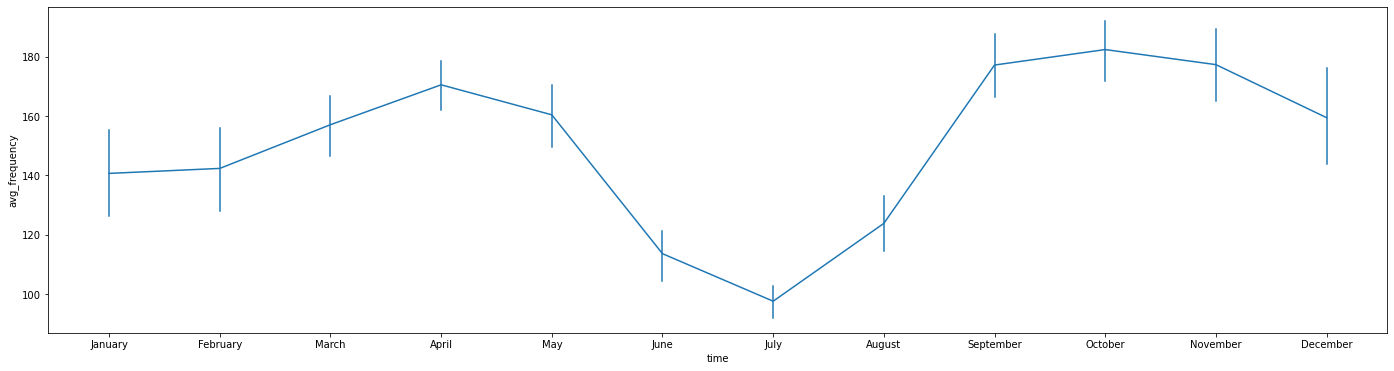

In [195]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))
sns.lineplot(x=summary_customers['time'].dt.month_name(), y=summary_customers.avg_frequency, err_style='bars')
# plt.legend()
plt.show()

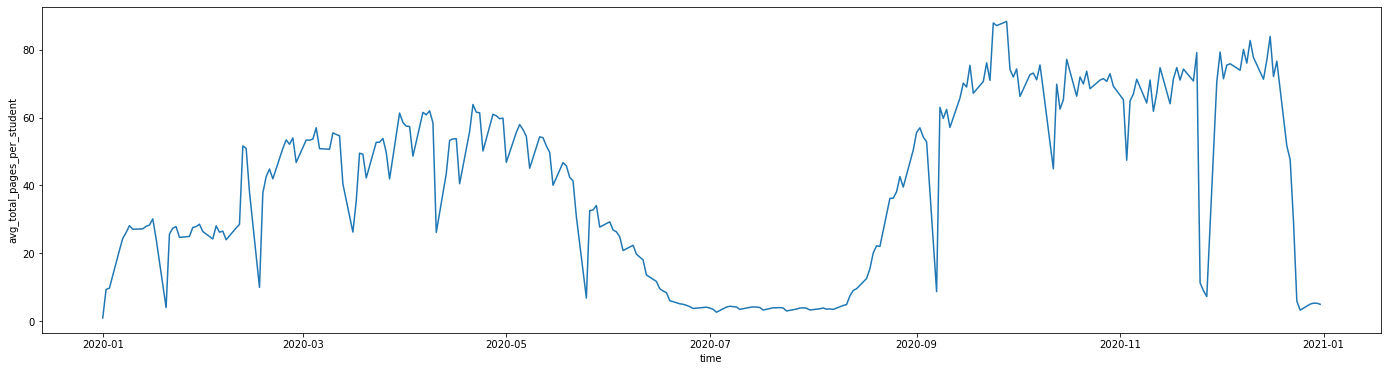

In [186]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))
sns.lineplot(x=summary_customers_without_weekends.time, y=summary_customers_without_weekends.avg_total_pages_per_student)
#plt.legend()
plt.show()

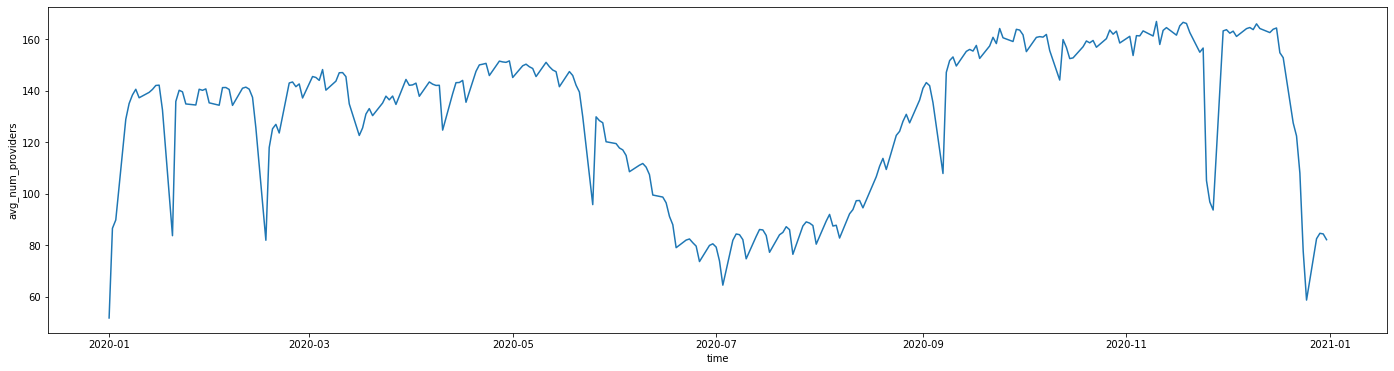

In [187]:

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))
sns.lineplot(x=summary_customers_without_weekends.time, y=summary_customers_without_weekends.avg_num_providers)
#plt.legend()
plt.show()

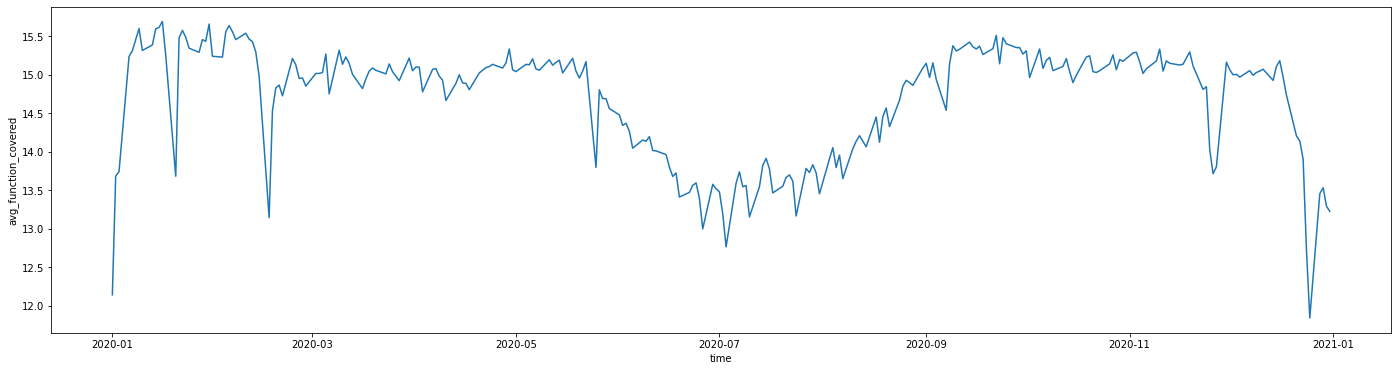

In [188]:

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))
sns.lineplot(x=summary_customers_without_weekends.time, y=summary_customers_without_weekends.avg_function_covered)
#plt.legend()
plt.show()

In [54]:
top_product_usage = data.query('engagement_index > 500').copy()


In [62]:
top_product_usage['month'] = top_product_usage['time'].dt.month

In [63]:
top_product_usage.tail()

,time,lp_id,pct_access,engagement_index,district_id,state,locale,pct_black_hispanic,pct_free_reduced,county_connections_ratio,pp_total_raw,url,product_name,provider_company_name,ps_function_main,ps_function_sub,corporate,higher_ed,prek_12,month
9139141,2020-12-18,47364,5.97,1886.73,7308,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[4000, 6000[",https://www.canvas.net/,Canvas,"Instructure, Inc.",LC,Online Course Providers & Technical Skills Dev...,1,1,1,12
9139147,2020-12-18,35007,1.68,541.55,7308,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[4000, 6000[",http://www.imaginelearning.com/,Imagine Learning,Imagine Learning,LC,Digital Learning Platforms,0,0,1,12
9139162,2020-12-18,95731,1.74,632.04,7308,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[4000, 6000[",http://docs.google.com/,Google Docs,Google LLC,LC,Content Creation & Curation,1,1,1,12
9139222,2020-12-18,61292,2.14,825.40,7308,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[4000, 6000[",http://www.youtube.com,YouTube,Google LLC,LC,"Sites, Resources & Reference",1,1,1,12
9139389,2020-12-22,61292,1.04,574.06,7308,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[4000, 6000[",http://www.youtube.com,YouTube,Google LLC,LC,"Sites, Resources & Reference",1,1,1,12


In [65]:
top_product = top_product_usage.groupby(['month', 'district_id','lp_id']).agg({'engagement_index':'mean'}).reset_index()\
    .groupby(['month', 'lp_id']).agg({'district_id':'count', 'engagement_index':'mean'}).reset_index().sort_values('month', ascending = True)
top_product.tail(40)

,month,lp_id,district_id,engagement_index
2066,12,50724,9,830.201354
2067,12,50762,3,737.688417
2058,12,49094,1,823.090000
2068,12,52615,21,920.725426
2070,12,54430,3,682.576667
2071,12,54550,1,602.970000
2072,12,54827,6,663.474849
2073,12,55031,34,919.522495
2074,12,55450,59,815.884182
2075,12,55589,32,717.168303


In [61]:
top_product.month.unique()

array(['April', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September'],
      dtype=object)

In [24]:
product = data[['lp_id','product_name', 'provider_company_name', 'ps_function_main', 'ps_function_sub', 'corporate','higher_ed', 'prek_12']].copy().drop_duplicates()

In [26]:
product.shape

(369, 8)

In [69]:
top_product = top_product.merge(product, how = 'left', on = 'lp_id')


In [82]:
top_product.query("month == 1").sort_values(['district_id'], ascending = [False]).head(30)

,month,lp_id,district_id,engagement_index,product_name,provider_company_name,ps_function_main,ps_function_sub,corporate,higher_ed,prek_12
56,1,95731,157,4994.553551,Google Docs,Google LLC,LC,Content Creation & Curation,1,1,1
97,1,24711,156,3756.229530,Kahoot!,Kahoot! AS,LC,Study Tools,1,1,1
156,1,32213,140,4239.954270,Google Classroom,Google LLC,SDO,Learning Management Systems (LMS),1,1,1
65,1,99916,126,1428.964858,Google Drive,Google LLC,LC/CM/SDO,Other,1,1,1
162,1,33185,125,990.738286,Google Forms,Google LLC,CM,Classroom Engagement & Instruction,1,1,1
63,1,98265,99,936.485663,Quizlet,Quizlet,LC,Study Tools,0,0,1
5,1,69827,83,1030.951228,Google Sites,Google LLC,SDO,"Data, Analytics & Reporting",1,1,1
108,1,28504,73,753.944887,Google Sheets,Google LLC,LC/CM/SDO,Other,1,1,1
171,1,36692,72,899.349939,Epic! - Unlimited Books for Kids,"Epic Creations, Inc.",LC,Digital Learning Platforms,0,0,1
60,1,97280,67,954.574681,Newsela,Newsela,LC,Digital Learning Platforms,0,0,1


In [87]:
top_product[top_product['product_name'] == 'Zoom']

,month,lp_id,district_id,engagement_index,product_name,provider_company_name,ps_function_main,ps_function_sub,corporate,higher_ed,prek_12
451,3,61945,75,1563.753184,Zoom,"ZOOM VIDEO COMMUNICATIONS, INC.",CM,Virtual Classroom,1,1,1
670,4,61945,74,1466.949833,Zoom,"ZOOM VIDEO COMMUNICATIONS, INC.",CM,Virtual Classroom,1,1,1
883,5,61945,64,1234.206742,Zoom,"ZOOM VIDEO COMMUNICATIONS, INC.",CM,Virtual Classroom,1,1,1
1062,6,61945,35,1153.112586,Zoom,"ZOOM VIDEO COMMUNICATIONS, INC.",CM,Virtual Classroom,1,1,1
1174,7,61945,2,580.295556,Zoom,"ZOOM VIDEO COMMUNICATIONS, INC.",CM,Virtual Classroom,1,1,1
1259,8,61945,46,4594.706556,Zoom,"ZOOM VIDEO COMMUNICATIONS, INC.",CM,Virtual Classroom,1,1,1
1441,9,61945,74,3154.906838,Zoom,"ZOOM VIDEO COMMUNICATIONS, INC.",CM,Virtual Classroom,1,1,1
1631,10,61945,66,2308.892788,Zoom,"ZOOM VIDEO COMMUNICATIONS, INC.",CM,Virtual Classroom,1,1,1
1827,11,61945,74,2195.168964,Zoom,"ZOOM VIDEO COMMUNICATIONS, INC.",CM,Virtual Classroom,1,1,1
2013,12,61945,76,2661.678287,Zoom,"ZOOM VIDEO COMMUNICATIONS, INC.",CM,Virtual Classroom,1,1,1


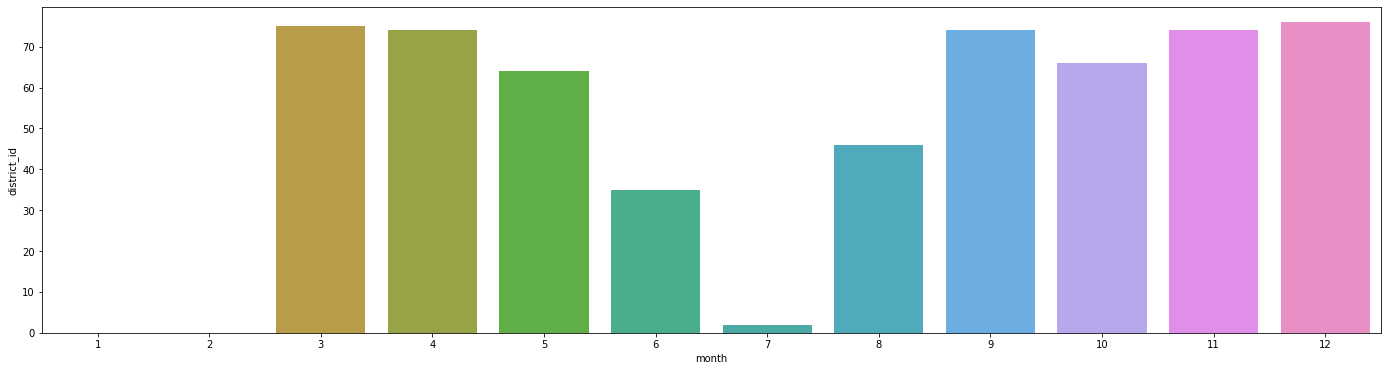

In [107]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))
sns.barplot(x=top_product['month'], y=top_product[top_product['product_name'] == 'Zoom']['district_id'])

#plt.legend()
plt.show()

In [96]:
top_product[top_product['month'] == 1]

,month,lp_id,district_id,engagement_index,product_name,provider_company_name,ps_function_main,ps_function_sub,corporate,higher_ed,prek_12
0,1,10533,16,781.036554,Scholastic,Scholastic Inc,LC,"Sites, Resources & Reference",0,0,1
1,1,67035,9,651.441667,CommonLit,CommonLit,LC,Digital Learning Platforms,0,0,1
2,1,68019,16,790.922646,ConnectED,McGraw-Hill PreK-12,LC,Digital Learning Platforms,0,0,1
3,1,68713,9,743.362278,Discovery Education Math Techbook,Discovery Education,LC,Courseware & Textbooks,0,0,1
4,1,69757,7,729.794683,DeltaMath,DeltaMath,LC,Digital Learning Platforms,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
177,1,40928,12,695.640749,Pear Deck,Pear Deck,LC,Digital Learning Platforms,0,0,1
178,1,41424,9,817.845278,Common App,"The Common Application, Inc.",LC,Career Planning & Job Search,0,1,1
179,1,41581,3,915.264306,Tynker,Neuron Fuel,LC,Digital Learning Platforms,0,0,1
180,1,41587,1,860.030000,LinkedIn,LinkedIn,LC,Career Planning & Job Search,1,1,1


In [ ]:
# Remove weekends from the dataframe
usege_day['weekday'] = pd.DatetimeIndex(usege_day['time']).weekday
without_weekends = usege_day[usege_day.weekday < 5]

In [ ]:
usege_day['time'] = pd.to_datetime(usege_day['time'])

In [ ]:
# Figure 1
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))
sns.lineplot(x=without_weekends.time, y=without_weekends.lp_id)
plt.legend()
plt.show()

In [ ]:
products_info['primary_function_main'] = products_info['Primary Essential Function'].apply(lambda x: x.split(' - ')[0] if x == x else x)
products_info['primary_function_sub'] = products_info['Primary Essential Function'].apply(lambda x: x.split(' - ')[1] if x == x else x)
****
virtual_classroom_lp_id = products_info[products_info.PS_function_sub == 'Virtual Classroom']['LP ID'].unique()

# Remove weekends from the dataframe
engagement_full['weekday'] = pd.DatetimeIndex(engagement_full['time']).weekday
engagement_without_weekends = engagement[engagement.weekday < 5]

# Figure 1
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))
for virtual_classroom_product in virtual_classroom_lp_id:
    temp = engagement_without_weekends[engagement_without_weekends.lp_id == virtual_classroom_product].groupby('time').pct_access.mean().to_frame().reset_index(drop=False)
    sns.lineplot(x=temp.time, y=temp.pct_access, label=products_info[products_info['LP ID'] == virtual_classroom_product]['Product Name'].values[0])
plt.legend()
plt.show()

# Figure 2
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))
for virtual_classroom_product in virtual_classroom_lp_id:
    temp = engagement_without_weekends[engagement_without_weekends.lp_id == virtual_classroom_product].groupby('time').engagement_index.mean().to_frame().reset_index(drop=False)
    sns.lineplot(x=temp.time, y=temp.engagement_index, label=products_info[products_info['LP ID'] == virtual_classroom_product]['Product Name'].values[0])
plt.legend()
plt.show()
****

In [16]:
data['pct_black_hispanic'].unique()

array(['[0, 0.2[', '[0.2, 0.4[', '[0.6, 0.8[', '[0.4, 0.6[', '[0.8, 1['],
      dtype=object)